## Data Preperatin

In [1]:
from tensorflow import keras

In [2]:
import os, shutil

In [3]:
original_dataset_dir = './dataset/kaggle'

base_dir = './dataset/pet-images'
# os.mkdir()
os.makedirs(base_dir, exist_ok=True)

In [4]:
# make three different directories in basedir
train_dir = os.path.join(base_dir, 'train')
validatin_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

os.mkdir(train_dir)
os.mkdir(validatin_dir)
os.mkdir(test_dir)

In [5]:
# creating cat, dog folders for each train, test and validatin
cat_train_dir = os.path.join(train_dir, 'cat')
dog_train_dir = os.path.join(train_dir, 'dog')
os.mkdir(cat_train_dir)
os.mkdir(dog_train_dir)

cat_validatin_dir = os.path.join(validatin_dir, 'cat')
dog_validatin_dir = os.path.join(validatin_dir, 'dog')
os.mkdir(cat_validatin_dir)
os.mkdir(dog_validatin_dir)

cat_test_dir = os.path.join(test_dir, 'cat')
dog_test_dir = os.path.join(test_dir, 'dog')
os.mkdir(cat_test_dir)
os.mkdir(dog_test_dir)

In [6]:
# 1000 samples for train
# 500  samples for validatin
# 500. samples for test

# train cat
img_names = [f'{i}.jpg' for i in range(1000)]
for img in img_names:
    src = os.path.join(original_dataset_dir, 'Cat', img)
    dst = os.path.join(cat_train_dir, img)
    shutil.copy(src, dst)

# train dog
img_names = [f'{i}.jpg' for i in range(1000)]
for img in img_names:
    src = os.path.join(original_dataset_dir, 'Dog', img)
    dst = os.path.join(dog_train_dir, img)
    shutil.copy(src, dst)

# validatin cat
img_names = [f'{i}.jpg' for i in range(1000,  1500)]
for img in img_names:
    src = os.path.join(original_dataset_dir, 'Cat', img)
    dst = os.path.join(cat_validatin_dir, img)
    shutil.copy(src, dst)

# validatin dog
img_names = [f'{i}.jpg' for i in range(1000,  1500)]
for img in img_names:
    src = os.path.join(original_dataset_dir, 'Dog', img)
    dst = os.path.join(dog_validatin_dir, img)
    shutil.copy(src, dst)

# test cat
img_names = [f'{i}.jpg' for i in range(1500, 2000)]
for img in img_names:
    src = os.path.join(original_dataset_dir, 'Cat', img)
    dst = os.path.join(cat_test_dir, img)
    shutil.copy(src, dst)

# test dog
img_names = [f'{i}.jpg' for i in range(1500, 2000)]
for img in img_names:
    src = os.path.join(original_dataset_dir, 'Dog', img)
    dst = os.path.join(dog_test_dir, img)
    shutil.copy(src, dst)


In [7]:
print('Total training cat images:', len(os.listdir(cat_train_dir)))
print('Total training dog images:', len(os.listdir(dog_train_dir)))

print('Total validatin cat images:', len(os.listdir(cat_validatin_dir)))
print('Total validatin dog images:', len(os.listdir(dog_validatin_dir)))

print('Total test cat images:', len(os.listdir(cat_test_dir)))
print('Total test dog images:', len(os.listdir(dog_test_dir)))



Total training cat images: 1000
Total training dog images: 1000
Total validatin cat images: 500
Total validatin dog images: 500
Total test cat images: 500
Total test dog images: 500


## Model Architecture

In [8]:
from keras import layers
from keras import models

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


/Users/parsa/Desktop/projects/github/meow/venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
               optimizer=optimizers.RMSprop(learning_rate=1e-4),
               metrics=['acc'])

## Data preprocessing

In [31]:
import os
from PIL import Image
import io

def verify_images(directory):
    corrupted_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                file_path = os.path.join(root, file)
                try:
                    # Try to open and verify the image
                    with Image.open(file_path) as img:
                        img.verify()  # Verify it's a valid image
                except Exception as e:
                    print(f"Corrupted file: {file_path} - Error: {e}")
                    corrupted_files.append(file_path)
    
    return corrupted_files

# Check both directories
print("Checking training directory...")
corrupted_train = verify_images(train_dir)
print(f"\nFound {len(corrupted_train)} corrupted files in training set")

print("\nChecking validation directory...")
corrupted_val = verify_images(validatin_dir)
print(f"Found {len(corrupted_val)} corrupted files in validation set")

# Option to remove corrupted files
if corrupted_train or corrupted_val:
    response = input("\nDo you want to remove corrupted files? (yes/no): ")
    if response.lower() == 'yes':
        for file_path in corrupted_train + corrupted_val:
            os.remove(file_path)
            print(f"Removed: {file_path}")

Checking training directory...
Corrupted file: ./dataset/pet-images/train/cat/666.jpg - Error: cannot identify image file './dataset/pet-images/train/cat/666.jpg'

Found 1 corrupted files in training set

Checking validation directory...
Found 0 corrupted files in validation set
Removed: ./dataset/pet-images/train/cat/666.jpg


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory (
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validatin_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
data, lable = next(iter(train_generator))

In [25]:
lable.shape

(20,)

In [26]:
lable

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0.], dtype=float32)

In [27]:
data.shape

(20, 150, 150, 3)

In [33]:
for data_batch, lables_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('lables batch shape:', lables_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
lables batch shape: (20,)


In [34]:
hisotry = model.fit(
    train_generator, epochs=30,
    validation_data=validation_generator
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - acc: 0.5713 - loss: 0.6783 - val_acc: 0.5190 - val_loss: 0.6774
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - acc: 0.6298 - loss: 0.6511 - val_acc: 0.6040 - val_loss: 0.6504
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - acc: 0.6783 - loss: 0.6066 - val_acc: 0.6260 - val_loss: 0.6343
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - acc: 0.6893 - loss: 0.5817 - val_acc: 0.5690 - val_loss: 0.6961
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - acc: 0.7194 - loss: 0.5533 - val_acc: 0.6310 - val_loss: 0.6721
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - acc: 0.7314 - loss: 0.5309 - val_acc: 0.6830 - val_loss: 0.5916
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - acc: 0.7504 - loss: 0.5052 - val_acc: 0.6910 - val_loss: 0.5923
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - acc: 0.7634 - loss: 0.4850 - val_acc: 0.7110 - val_loss: 0.5698
Epoch 9/30
100/100 ━━━━━━━━━━━━━

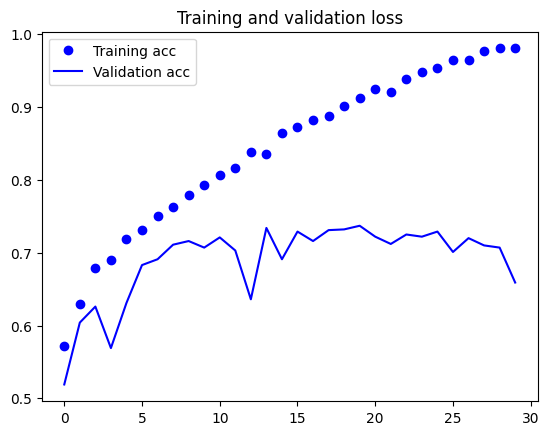

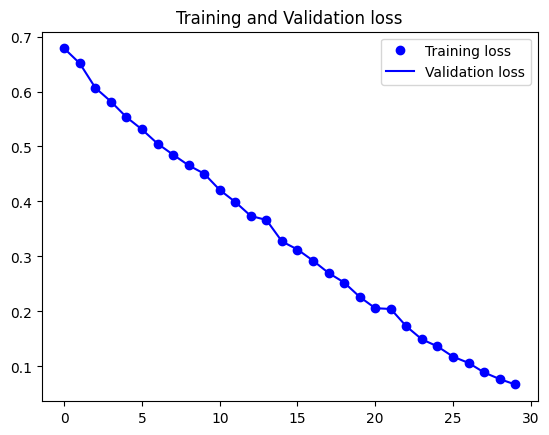

In [37]:
import matplotlib.pyplot as plt

acc = hisotry.history['acc']
val_acc = hisotry.history['val_acc']
loss = hisotry.history['loss']
val_loss = hisotry.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation loss")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, loss, 'b', label='Validation loss')
plt.title("Training and Validation loss")
plt.legend()

plt.show()

## Dropout

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/Users/parsa/Desktop/projects/github/meow/venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [47]:
history = model.fit(
      train_generator,
      epochs=40,
      validation_data=validation_generator)

Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - acc: 0.9595 - loss: 0.1124 - val_acc: 0.7600 - val_loss: 0.7336
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - acc: 0.9635 - loss: 0.1038 - val_acc: 0.7360 - val_loss: 0.8336
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - acc: 0.9695 - loss: 0.0875 - val_acc: 0.7570 - val_loss: 0.7455
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - acc: 0.9625 - loss: 0.1006 - val_acc: 0.7320 - val_loss: 0.8778
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - acc: 0.9665 - loss: 0.0883 - val_acc: 0.7480 - val_loss: 0.8123
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - acc: 0.9735 - loss: 0.0825 - val_acc: 0.7530 - val_loss: 0.7750
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - acc: 0.9625 - loss: 0.1007 - val_acc: 0.7580 - val_loss: 0.7744
Epoch 8/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - acc: 0.9740 - loss: 0.0780 - val_acc: 0.7550 - val_loss: 0.7775
Epoch 9/40
100/100 ━━━━━━━━━━━━━

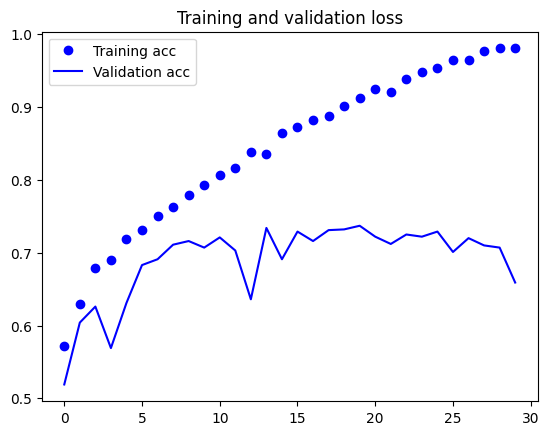

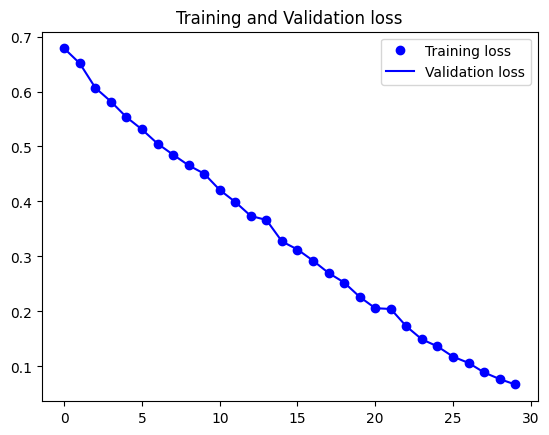

In [48]:
acc = hisotry.history['acc']
val_acc = hisotry.history['val_acc']
loss = hisotry.history['loss']
val_loss = hisotry.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation loss")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, loss, 'b', label='Validation loss')
plt.title("Training and Validation loss")
plt.legend()

plt.show()

In [49]:
model.save('cats_and_dogs_small_1.keras')